# Proyek Analisis Data: Bike Sharing
- **Nama:** Anindya Nitisari
- **Email:** m011d4kx2156@bangkit.academy
- **ID Dicoding:** M011D4KX2156

## Menentukan Pertanyaan Bisnis

- How is the increase in bike-sharing renters from 2011 to 2012?
- How often do renters use bike-sharing in a week?
- Does season influence the renter's use of a bike-sharing?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

The data used is bike-sharing data from
https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view

The data is downloaded and then manually imported into google colab.

Creating day_df Table

In [4]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Creating hour_df Table

In [5]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Checking for various problems that exist in the bike sharing data, such as missing values, duplicates, and data types.

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Based on the results of assessing data above, it can be seen that there are no missing values and duplications in the day_df data and hour_df data.

### Cleaning Data

Change the data type of variable dteday from object to date time.

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [13]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

Change the data content of season, year, month, weekday, weather situation variables so that it is easier to understand.

In [14]:
day_df.season.replace([1,2,3,4],["Spring", "Summer", "Fall", "Winter"], inplace=True)
hour_df.season.replace([1,2,3,4],["Spring", "Summer", "Fall", "Winter"], inplace=True)

In [15]:
day_df.yr.replace([0,1],["2011", "2012"], inplace=True)
hour_df.yr.replace([0,1],["2011", "2012"], inplace=True)

In [16]:
day_df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], inplace=True)
hour_df.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"], inplace=True)

In [17]:
day_df.weekday.replace([0,1,2,3,4,5,6],["Sun","Mon","Tue","Wed","Thu","Fri","Sat"], inplace=True)
hour_df.weekday.replace([0,1,2,3,4,5,6],["Sun","Mon","Tue","Wed","Thu","Fri","Sat"], inplace=True)

In [18]:
day_df.weathersit.replace([1,2,3,4],["Clear", "Cloudy", "Light Rain", "Heavy Rain"], inplace=True)
hour_df.weathersit.replace([1,2,3,4],["Clear", "Cloudy", "Light Rain", "Heavy Rain"], inplace=True)

In [19]:
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,Spring,2012,Dec,0,Thu,1,Cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,Spring,2012,Dec,0,Fri,1,Cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,Spring,2012,Dec,0,Sat,0,Cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,Spring,2012,Dec,0,Sun,0,Clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [20]:
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Spring,2012,Dec,19,0,Mon,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,Spring,2012,Dec,20,0,Mon,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,Spring,2012,Dec,21,0,Mon,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,Spring,2012,Dec,22,0,Mon,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [21]:
day_df.describe(include="all")

<ipython-input-21-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,Jan,NaN,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,0.167155,NaN,0.465233,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Checking the number of bike-sharing renters for each season.

In [22]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

Check the number of bike-sharing renters by year.

In [23]:
day_df.groupby(by="yr").agg({
    "registered" : "sum",
    "casual" : "sum"
})

,registered,casual
yr,,
2011,995851,247252
2012,1676811,372765


Checking the number of bike-sharing renters every day.

In [24]:
day_df.groupby(by="weekday").cnt.sum().sort_values(ascending=False).reset_index().head(7)

,weekday,cnt
0,Fri,487790
1,Thu,485395
2,Sat,477807
3,Wed,473048
4,Tue,469109
5,Mon,455503
6,Sun,444027


Checking the number of bike-sharing renters based on weather situasion.

In [25]:
day_df.groupby(by="weathersit").cnt.sum().sort_values(ascending=False).reset_index().head(4)

,weathersit,cnt
0,Clear,2257952
1,Cloudy,996858
2,Light Rain,37869


Check the number of bike-sharing renters each month.

In [26]:
day_df.groupby(by="mnth").cnt.sum().sort_values(ascending=False).reset_index().head(12)

,mnth,cnt
0,Aug,351194
1,Jun,346342
2,Sep,345991
3,Jul,344948
4,May,331686
5,Oct,322352
6,Apr,269094
7,Nov,254831
8,Mar,228920
9,Dec,211036


Checking the number of registered and casual renters of bike-sharing based on the day of the week.

In [27]:
day_df.groupby(by="weekday").agg({
    "registered" : "sum",
    "casual" : "sum"
})

,registered,casual
weekday,,
Fri,409552,78238
Mon,384719,70784
Sat,323955,153852
Sun,303506,140521
Thu,423935,61460
Tue,411266,57843
Wed,415729,57319


### Explore Data hour_df

In [28]:
hour_df.describe(include="all")

<ipython-input-28-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,2012,May,NaN,NaN,Sat,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,0.167165,NaN,0.465431,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Checking the number of renters from bike-sharing per hour.

In [29]:
hour_df.groupby(by="hr").agg({
    "cnt": "sum"
})

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


## Visualization & Explanatory Analysis

### Question 1: How does the number of bike-sharing renters increase from 2011 to 2012?

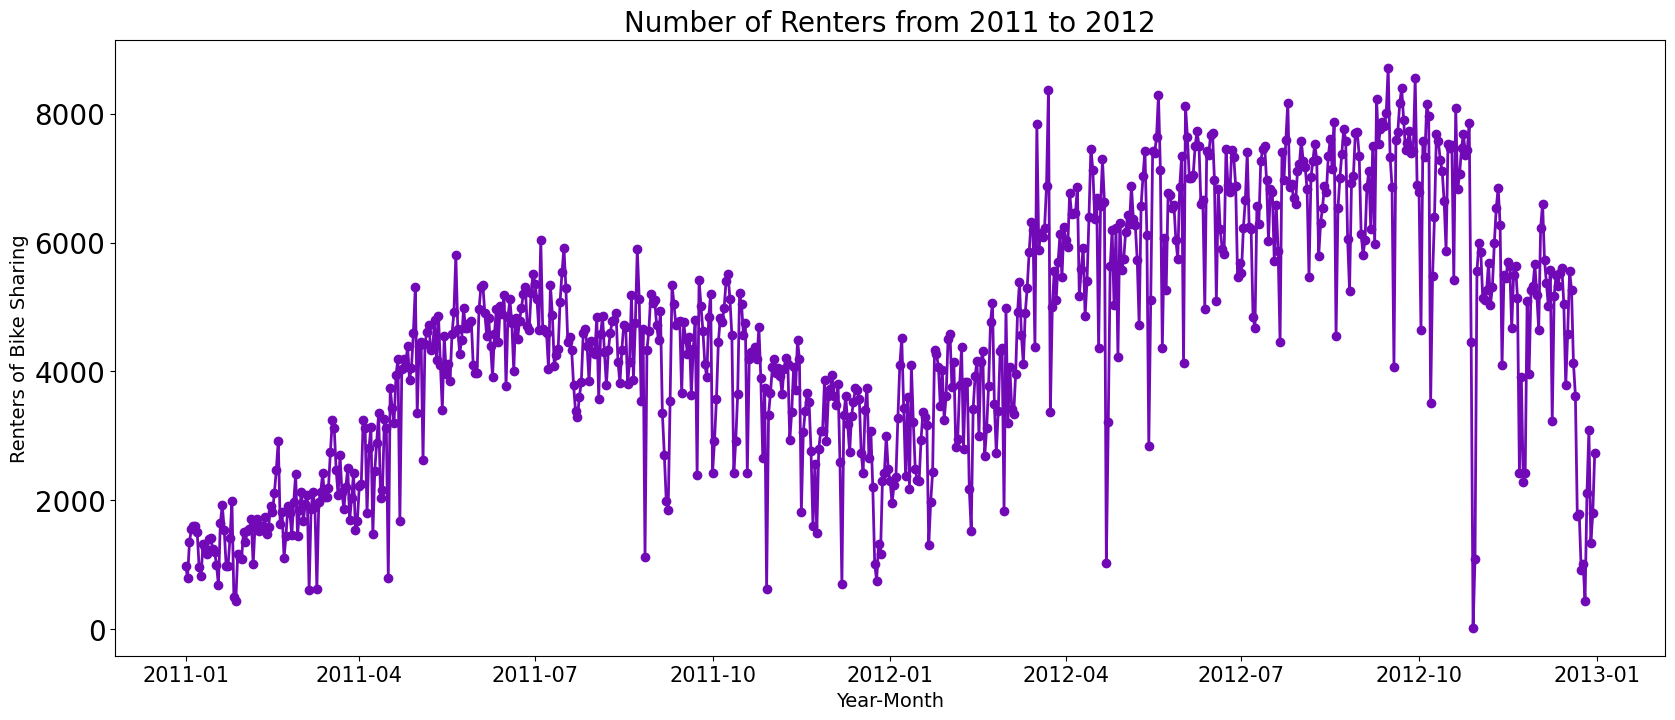

In [35]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(
    day_df["dteday"],
    day_df["cnt"],
    marker='o',
    linewidth=2,
    color="#7209B7"
)
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("Renters of Bike Sharing", fontsize=14)
plt.title("Number of Renters from 2011 to 2012", loc="center", fontsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)

plt.show()

### Question 2: How often do renters use bike sharing in a week?

<ipython-input-36-dcf918befc58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


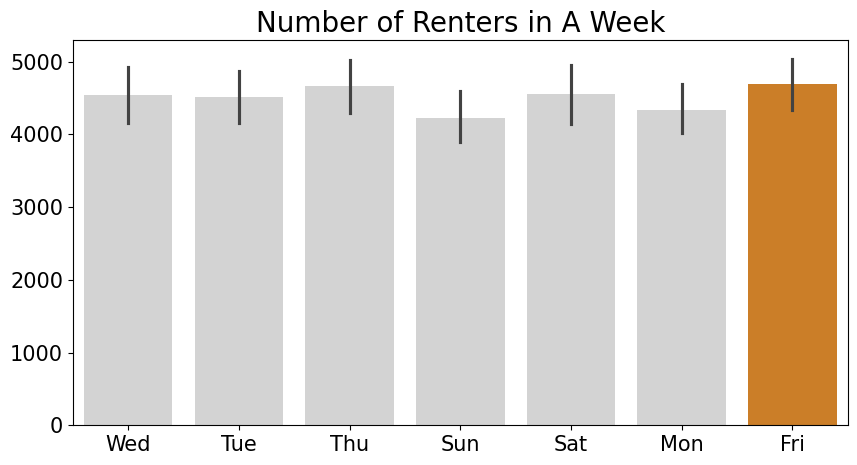

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#E67F0D"]
sns.barplot(
    x="weekday",
    y="cnt",
    data=day_df.sort_values(by="weekday", ascending=False),
    palette=colors,
    ax=ax
    )

plt.xlabel(None)
plt.ylabel(None)
plt.title("Number of Renters in A Week", loc="center", fontsize=20)
plt.tick_params(axis ='x', labelsize=15)
plt.tick_params(axis ='y', labelsize=15)

plt.show()

### Question 3: Does season influence the renter's use of a bike share?


<ipython-input-32-8558f9b706ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


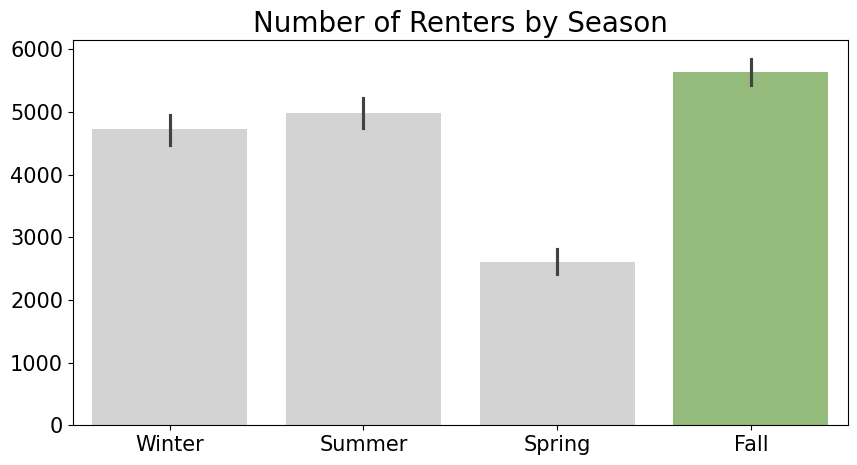

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#93C572"]
sns.barplot(
    x="season",
    y="cnt",
    data=day_df.sort_values(by="season", ascending=False),
    palette=colors,
    ax=ax
    )

ax.set_xlabel(None)
ax.set_ylabel(None)
ax.set_title("Number of Renters by Season", loc="center", fontsize=20)
ax.tick_params(axis ='x', labelsize=15)
ax.tick_params(axis ='y', labelsize=15)

plt.show()

### Additional Analysis


The following analysis is an additional analysis using the RFM method.

In [33]:
rfm_df = hour_df.groupby(by="registered", as_index=False).agg({
    "dteday": "max",
    "instant": "count",
    "cnt": "sum"
})
rfm_df.columns = ["Reg Renter", "Day", "Frequency", "Monetary"]

rfm_df["Day"] = rfm_df["Day"].dt.date
recent_date = hour_df["dteday"].dt.date.max()
rfm_df["recency"] = rfm_df["Day"].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,Reg Renter,Day,Frequency,Monetary,recency
0,0,2012-11-23,24,35,38
1,1,2012-12-31,201,294,0
2,2,2012-12-30,245,648,1
3,3,2012-12-31,294,1154,0
4,4,2012-12-28,307,1602,3


## Conclusion

- Conclusion from question 1: The number of bike-sharing renters gradually increased from 2011 to 2012 with the highest number of renters in September 2012.
- Conclusion from question 2: Renters mostly use bike-sharing on Fridays and rarely use it on Saturdays.
- Conclusion from question 3: Based on the bar chart above, it can be seen that seasons affect the number of bike-sharing renters. Bike-sharing is most rented during the fall season and least rented during the spring season.

In [37]:
day_df.to_csv("day_data.csv", index=False)

In [38]:
hour_df.to_csv("hour_data.csv", index=False)